In [2]:

import boto3
from boto.s3.connection import S3Connection
import os
import json
import boto.s3
import sys
import datetime
from boto.s3.key import Key
import pandas as pd
import pylab
import csv
import io
import requests
import time
import json
import seaborn as sns
import scipy
import numpy as np
import glob
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
from collections import Counter
from pylab import *
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm



## Importing JSON File contents
with open('configEDA.json') as data_file:
    data = json.load(data_file)

AWSAccess=data["AWSAccess"]
AWSSecret=data["AWSSecret"]



# edadata= pd.read_csv('cleanlisting.csv')
# print(Airbnb_df.head(5))



In [3]:



link="https://s3.amazonaws.com/adsteam8finalairbnb/CleanData/cleanlisting.csv"
Airbnb_df =  pd.read_csv(link,low_memory=False)

print(Airbnb_df.shape)



# edadata= pd.read_csv('cleanlisting.csv',encoding = 'utf-8')
# print(edadata.head(5))

        
     

 

(34590, 38)


In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl

pd.set_option('max_columns', 50)
mpl.rcParams['lines.linewidth'] = 2

%matplotlib inline


In [5]:
edadata=Airbnb_df

In [13]:
# Categorizing differernt listings based on room_type


#how many types of room 
roomTyp=edadata.groupby('room_type').id.count()
roomTyp=roomTyp.reset_index()
roomTyp=roomTyp.rename(columns={'id':'number_Of_Listings'})
roomTyp

,room_type,number_Of_Listings
0,Entire home/apt,16617
1,Private room,16820
2,Shared room,1153


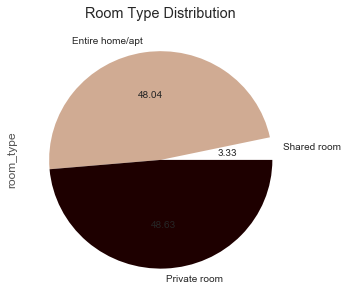

In [14]:
#the number of listings based upon room type.Visualizing 
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

room = edadata.room_type
r = Counter(room)

rooms = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
rooms.columns = ['room_type']
rooms.plot.pie(y = 'room_type', 
                 colormap = 'pink_r', 
                 figsize=(5,5), 
                 fontsize = 10, autopct = '%.2f',
                 legend = False,
                 title = 'Room Type Distribution')

In [15]:
print(edadata.shape)
print(edadata['price'].mean())


(34590, 38)
138.148077479


In [16]:
#price o various venur availbale  
# analyzing the prices for different room type and property type

venueproperty = edadata.groupby(['property_type','room_type']).price.mean()
venueproperty = venueproperty.reset_index()
venueproperty=venueproperty.sort_values('price',ascending=[0])
venueproperty.head()

,property_type,room_type,price
8,Boat,Entire home/apt,534.444444
57,Vacation home,Entire home/apt,529.000000
52,Timeshare,Private room,378.000000
29,Guest suite,Entire home/apt,374.000000
51,Timeshare,Entire home/apt,304.428571


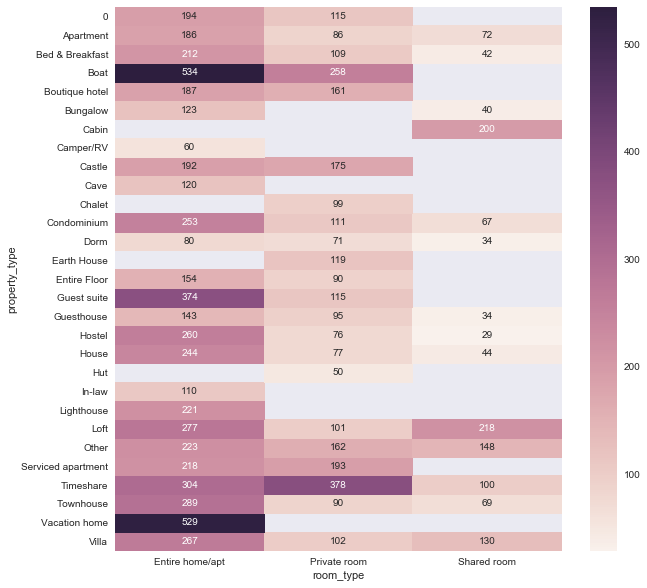

In [34]:
# heat map

#Plotting the same on a heatMap

import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(edadata.groupby([
        'property_type', 'room_type']).price.mean().unstack(),annot=True, fmt=".0f") #string format 


In [9]:
#additional amenities costs more ?
dryerdf = edadata.groupby(['Dryer','Washer' ]).price.mean()
tvdf = edadata.groupby(['bathrooms','beds' ]).price.mean()


tvdf = tvdf.reset_index()

dryerdf = dryerdf.reset_index()


tvdf=tvdf.sort_values('price',ascending=[0])
dryerdf=dryerdf.sort_values('price',ascending=[0])

print(tvdf.head())
dryerdf.head()



     bathrooms  beds   price
109        6.5   7.0  5700.0
89         4.5   5.0  3500.0
87         4.0  11.0  3025.0
102        5.5   6.0  2750.0
106        6.0   6.0  2000.0


,Dryer,Washer,price
0,1,1,138.148077


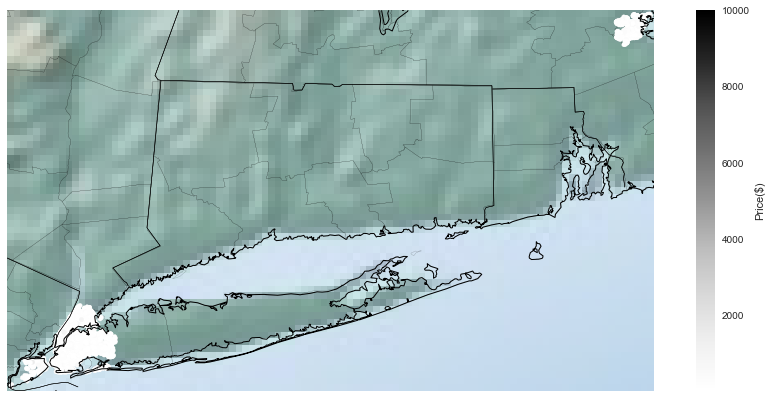

In [14]:
##coordinates for plotting 

long_max = edadata['longitude'].max() + .02
long_min = edadata['longitude'].min() -.02
mid_long = (edadata['longitude'].min() + edadata['longitude'].max())/2

lat_max = edadata['latitude'].max() + .02
lat_min = edadata['latitude'].min() - .02
mid_lat = (edadata['latitude'].min() + edadata['latitude'].max())/2

## map
m = Basemap(projection='cyl',lat_0=mid_lat,lon_0=mid_long,\
            llcrnrlat=lat_min,urcrnrlat=lat_max,\
            llcrnrlon=long_min,urcrnrlon=long_max,\
            rsphere=6371200.,resolution='h',area_thresh=10)
m.drawcoastlines()
m.drawstates()
m.drawcounties()
m.shadedrelief()

## locations
x, y = m(edadata['longitude'], edadata['latitude'])
sp = plt.scatter(x, y, c=edadata['price'], s=20)
plt.rcParams["figure.figsize"] = [12,12]
cb = plt.colorbar(sp)
cb.set_label('Price($)')
plt.show()
plt.clf()

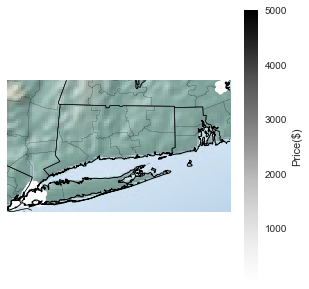

In [11]:
df3 = edadata.sample(frac=.25)

m2 = Basemap(projection='cyl',lat_0=mid_lat,lon_0=mid_long,\
            llcrnrlat=lat_min,urcrnrlat=lat_max,\
            llcrnrlon=long_min,urcrnrlon=long_max,\
            rsphere=6371200.,resolution='h',area_thresh=10)
m2.drawcoastlines()
m2.drawstates()
m2.drawcounties()
m2.shadedrelief()

x1, y1 = m(df3['longitude'], df3['latitude'])
sp1 = plt.scatter(x1, y1, c=df3['price'], s=20)



plt.rcParams["figure.figsize"] = [15,7]
cb1 = plt.colorbar(sp1)
cb1.set_label('Price($)')
plt.show()

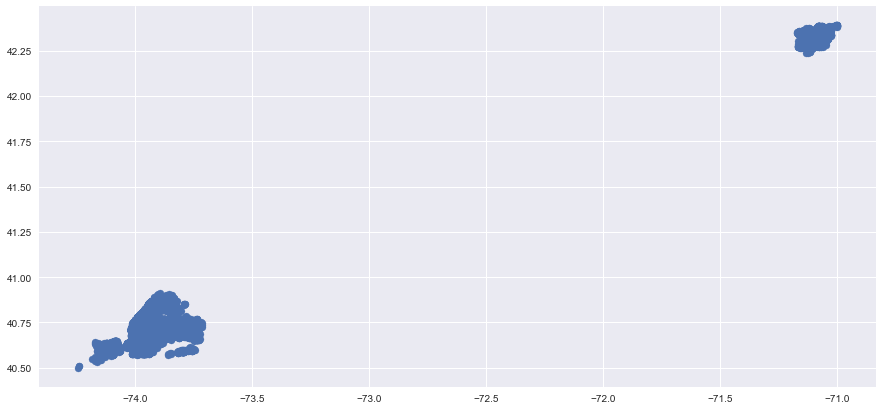

In [12]:

#sample = edadata.sample()
plt.scatter(edadata['longitude'], edadata['latitude'])

In [ ]:
#import geopandas as gpd

In [22]:
print(edadata.describe())


                 id       host_id  host_response_rate  \
count  3.459000e+04  3.459000e+04        34590.000000   
mean   1.016979e+07  3.160529e+07           66.567968   
std    5.519253e+06  3.300904e+07           44.568414   
min    2.515000e+03  2.830000e+02            0.000000   
25%    5.642267e+06  5.317388e+06            0.000000   
50%    1.038691e+07  1.969372e+07          100.000000   
75%    1.503483e+07  4.777924e+07          100.000000   
max    1.851999e+07  1.284849e+08          100.000000   

       host_total_listings_count       zipcode      latitude     longitude  \
count               34590.000000  34590.000000  34590.000000  34590.000000   
mean                    5.756317   9918.857791     40.868665    -73.710351   
std                    46.591652   2444.567931      0.451826      0.801959   
min                     0.000000   2108.000000     40.499794    -74.240843   
25%                     1.000000  10016.000000     40.694964    -73.981439   
50%               

C:\ProgramData\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2881: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000003168DD68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000019F8A198>]], dtype=object)

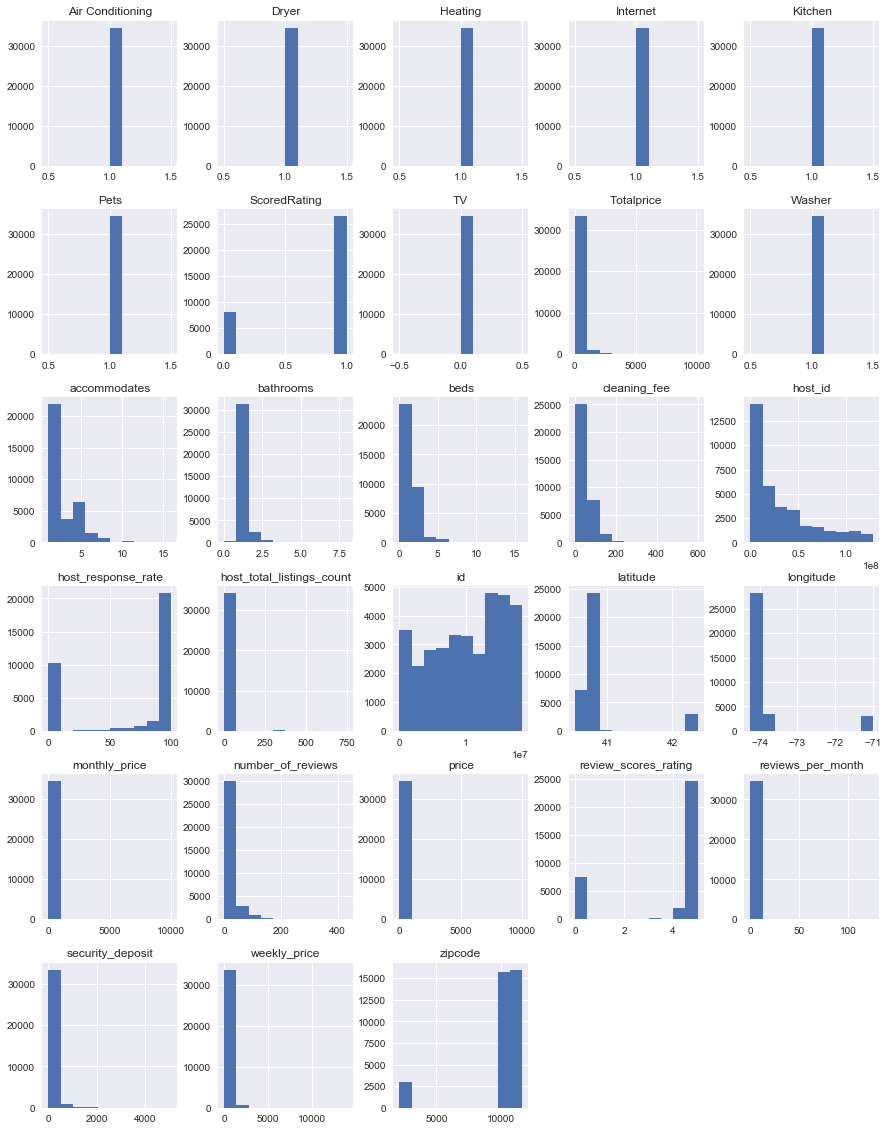

In [15]:
# fig=edadata.hist()

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
edadata.hist(ax = ax)

In [16]:
# Total price and adding a new column
edadata['Totalprice'] = edadata['security_deposit'] + edadata['cleaning_fee']+edadata['price']
print(edadata.Totalprice.head())


0    285.0
1    170.0
2     65.0
3     94.0
4    105.0
Name: Totalprice, dtype: float64


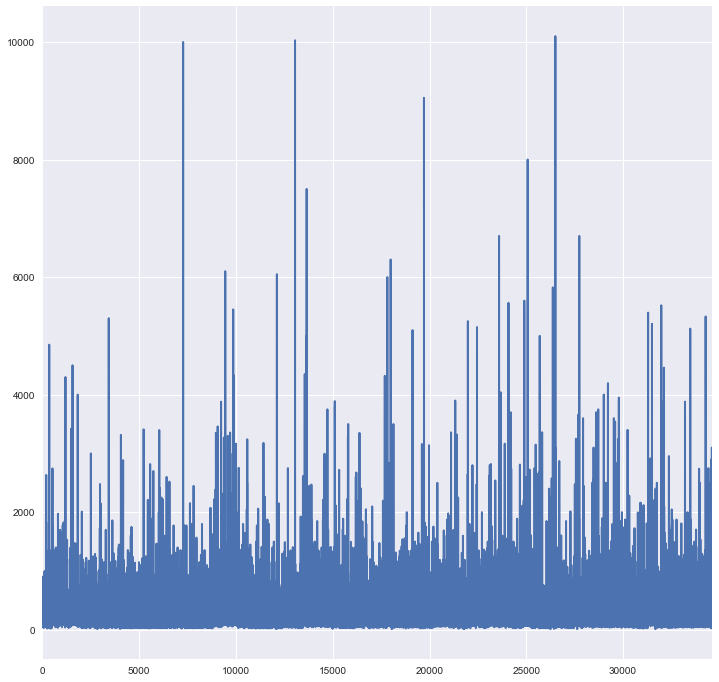

In [17]:
edadata.Totalprice.plot.line() # price

In [ ]:
# price vs venue
#edadata.groupby('room_type').hist()



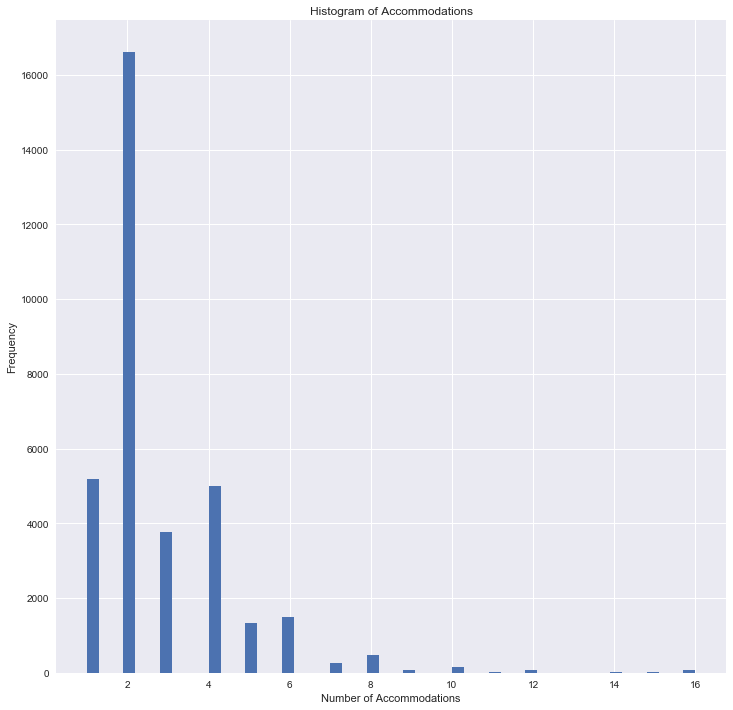

In [18]:
# visualize distribution of price (target variable)
plt.hist(edadata['accommodates'], bins=50)
plt.title("Histogram of Accommodations")
plt.xlabel("Number of Accommodations")
plt.ylabel("Frequency")
plt.show()

In [19]:
print ('Number of Unique Beds: ', np.unique(edadata['beds']))
for i in range(1, 17):
    print( 'Beds {}:'.format(i), len(edadata[edadata['beds'] == i]))

('Number of Unique Beds: ', array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.]))
('Beds 1:', 23470)
('Beds 2:', 7106)
('Beds 3:', 2312)
('Beds 4:', 941)
('Beds 5:', 357)
('Beds 6:', 184)
('Beds 7:', 63)
('Beds 8:', 41)
('Beds 9:', 15)
('Beds 10:', 27)
('Beds 11:', 7)
('Beds 12:', 6)
('Beds 13:', 1)
('Beds 14:', 2)
('Beds 15:', 1)
('Beds 16:', 7)


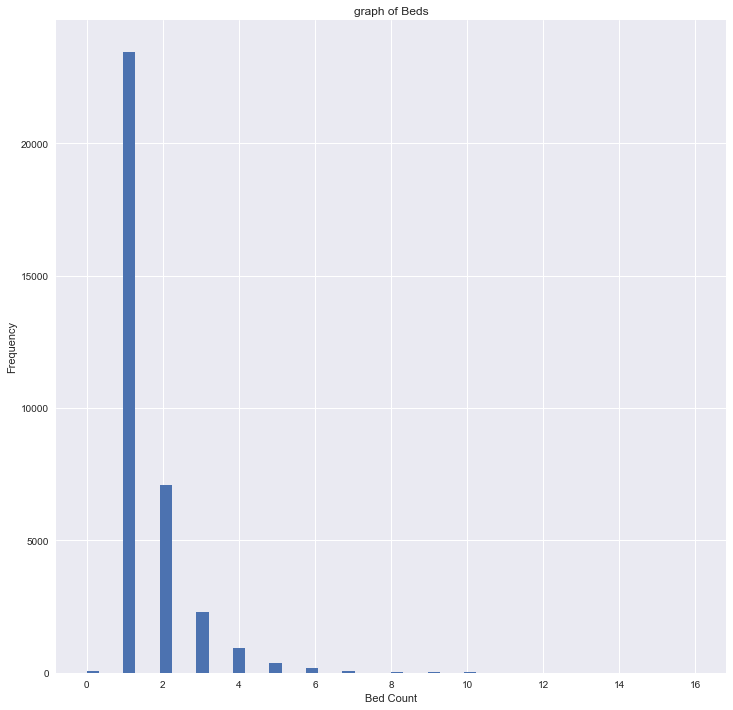

In [20]:
# visualize distribution of beds
plt.hist(edadata['beds'], bins=50)
plt.title("graph of Beds")
plt.xlabel("Bed Count")
plt.ylabel("Frequency")
sns.plt.show()

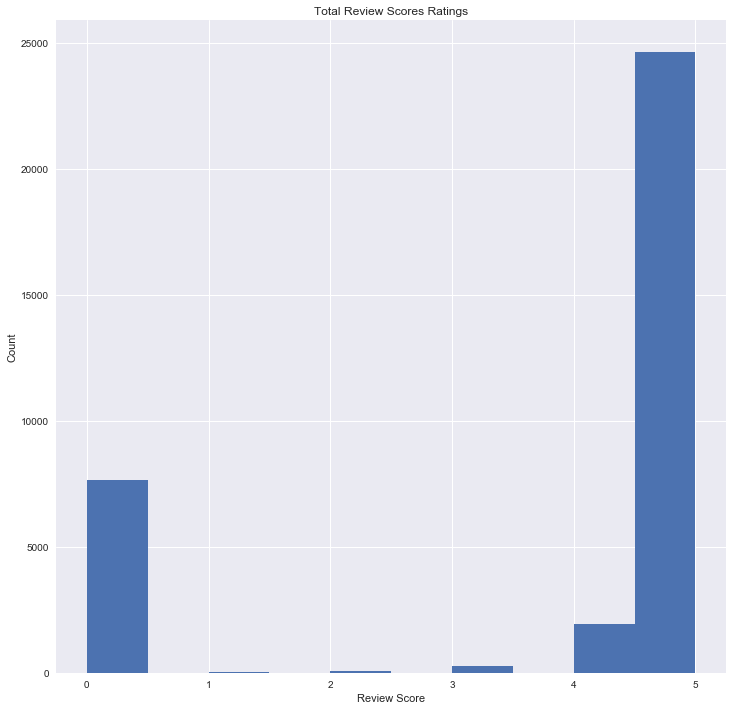

In [21]:
#  review scores ratings
plt.hist(edadata['review_scores_rating'][~edadata['review_scores_rating'].isnull()])
plt.title("Total Review Scores Ratings")
plt.xlabel("Review Score")
plt.ylabel("Count")
plt.show()

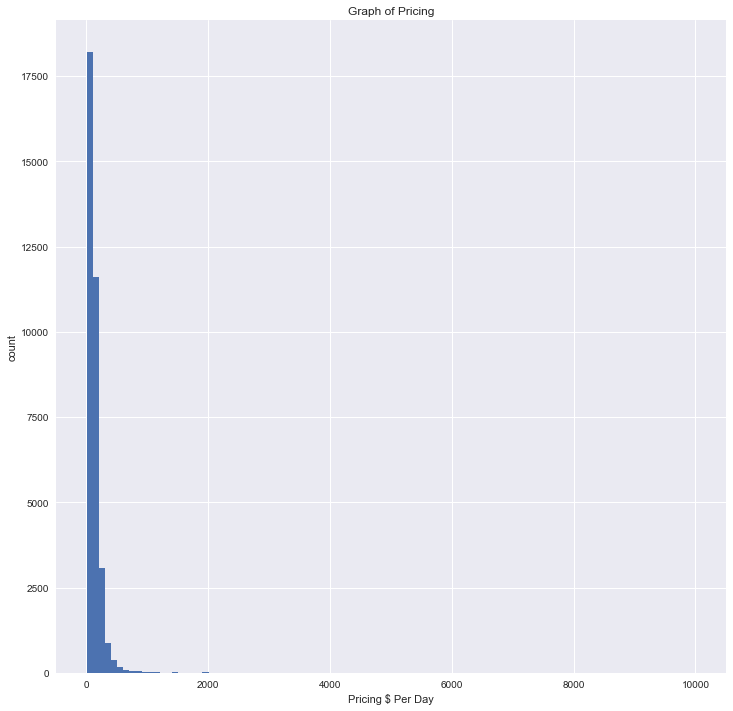

In [22]:
# visualize distribution of price (target variable)
plt.hist(edadata['price'], bins=100 )
plt.title("Graph of Pricing")
plt.xlabel("Pricing $ Per Day")
plt.ylabel("count")
sns.plt.show()

In [23]:
# log transform the response 'price'
edadata['price_log'] = edadata['price'].apply(lambda x: math.log(x))

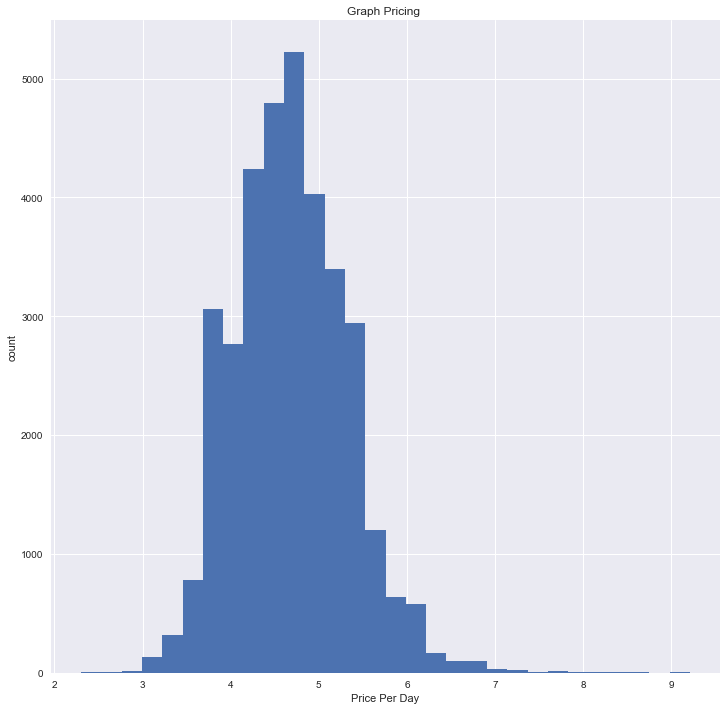

In [24]:
# price distribution (target variable)
plt.hist(edadata['price_log'], bins=30)
plt.title("Graph Pricing ")
plt.xlabel("Price Per Day")
plt.ylabel("count")
sns.plt.show()

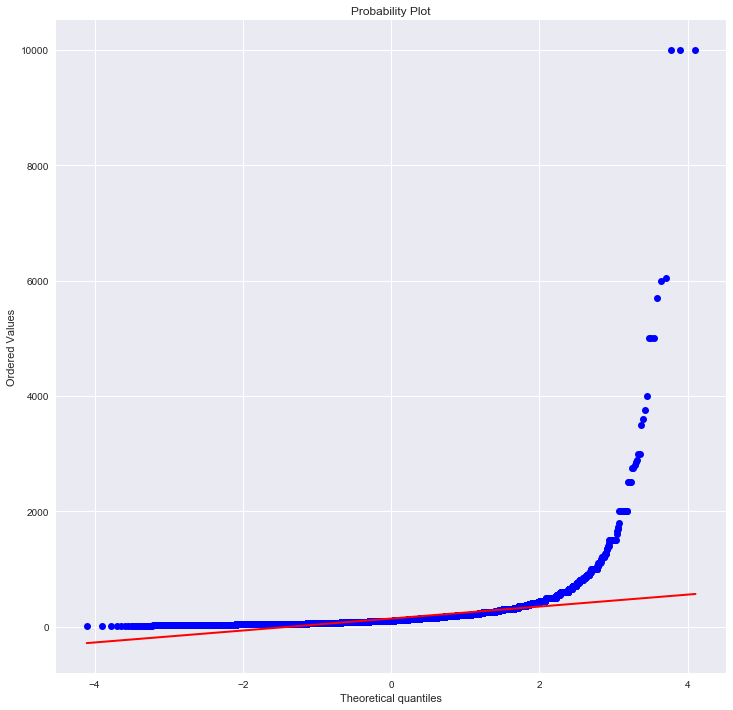

In [25]:
# qq plot for log-transformed pricing
stats.probplot(edadata['price'], dist="norm", plot=pylab)
pylab.show()

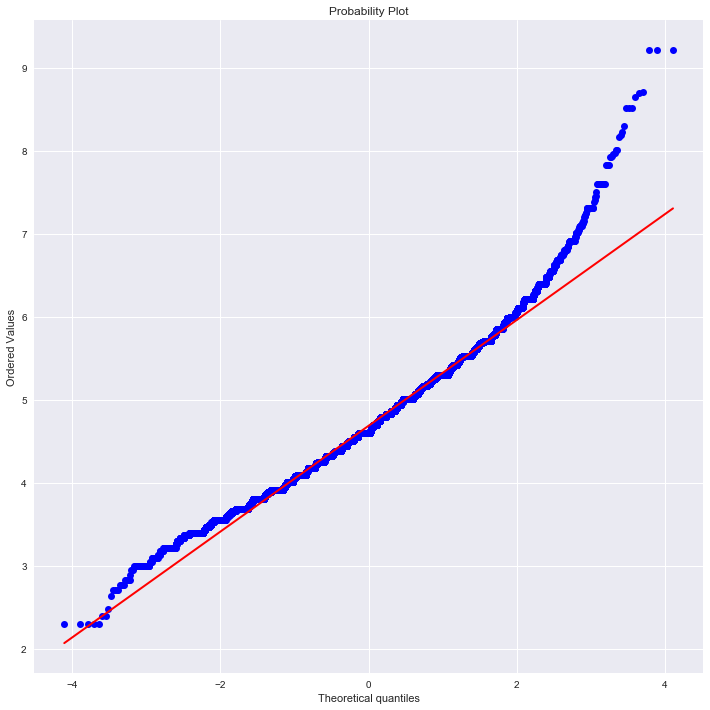

In [26]:
# qq plot for log-transformed pricing
stats.probplot(edadata['price_log'], dist="norm", plot=pylab)
pylab.show()

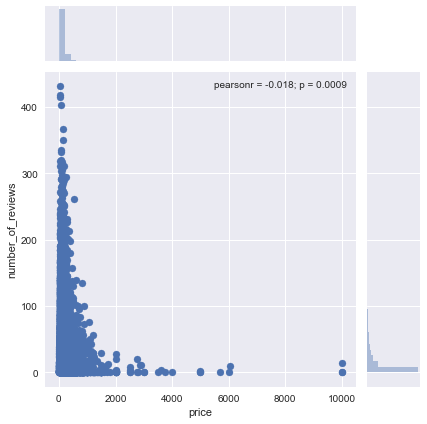

In [27]:
edadata['id'].dtype
edadata.dtypes
# number of reviews and price
reviews=edadata[['price','number_of_reviews']]
sns.jointplot('price','number_of_reviews',data=reviews)

In [30]:
# edadata.id.astype("float")
# convert text-based columns to dummies 
for var_name in edadata:
    dummies = pd.get_dummies(edadata['id'], prefix=var_name)
        
    # Drop the current variable, concat/append the dummy dataframe to the dataframe.
    edadata = pd.concat([edadata.drop(var_name, 1), dummies.iloc[:,1:]], axis = 1)
    
print(edadata)

KeyError: 'id'

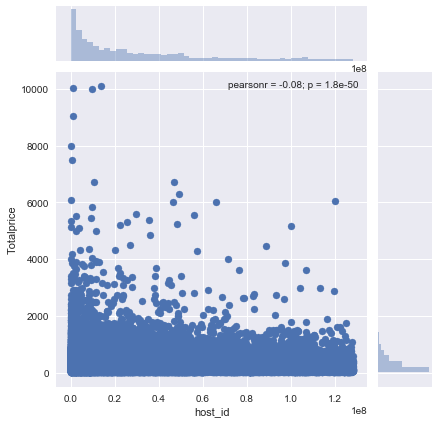

In [31]:

hostprice=edadata[['host_id','Totalprice']]
sns.jointplot('host_id','Totalprice',data=hostprice)


#plt.scatter(edadata.host_id, edadata.Totalprice)


In [32]:
# roomtypeprice=edadata[['Totalprice','room_type']]
# sns.jointplot('Totalprice','room_type',data=roomtypeprice)


# roomTypeDF=edadata.groupby('room_type').id.count()
# roomTypeDF.hist()

plt.hist(edadata.groupby('room_type').id.count(), bins=30)
plt.title("roomtype")
plt.xlabel("id")
plt.ylabel("count")
sns.plt.show()

AttributeError: 'DataFrameGroupBy' object has no attribute 'id'

In [33]:
listings['property_type'].value_counts()

NameError: name 'listings' is not defined

In [ ]:


proprytypeDF = edadata.groupby('property_type').id.count()
proprytypeDF.hist()

In [ ]:
roomPrptyDF = edadata.groupby(['property_type','room_type']).price.mean()
roomPrptyDF.hist()

In [29]:
# from pandas.tools.plotting import scatter_matrix
# scatter_matrix(edadata, alpha=0.2, figsize=(10, 10), diagonal='kde')
price_property=edadata[['price','property_type']]
price_property_mean=edadata.groupby('property_type').mean().round(2)


In [7]:
import mplleaflet

sample = edadata.sample(1000)
plt.scatter(sample['longitude'], sample['latitude'])

mplleaflet.display()